In [1]:
### Content

# 1- Libraries
# 2- API Integration
# 3- Download the Files
# 4- Read the Files

# 5- Data Preparation
# 5.1 Drop Unnecessary Columns 
# 5.2 Encoding

# 6- Exploratory Data Analysis
# 6.1- Statistical Analysis
# 6.2- Histograms
# 6.3- Distributions
# 6.4- Scatter-Plotting
# 6.5- Outliers Checking

# 7- Building Model-0 // Benchmark
# 7.1- Logistic Regression

# 8- Data Cleaning
# 8.1- Drop Outliers
# 8.1.1- Balance
# 8.1.2- EstimatedSalary
# 8.2- Standart Scaler

# 9- Building Alternative Models
# 9.1- Model 1 - Decision Trees
# 9.2- Model 2 - Random Forest
# 9.3- Model 3 - Gradient Boosting Machines
# 9.4- Model 4 - xgboost

# 10- Handling Imbalanced Data
# 11- Re-Train Best Performed Model with Balanced Dataset 

# 12- Feature Engineering
# 12.1 Correlation Test
# 12.2 Recursive Feature Elimination

# 13- Hyperparameter Tuning
# 13.1- Grid Search
# 13.2- Random Search

# 14- Cross Validation
# 15- Prediction

### 1- Libraries

In [2]:
### 1- Libraries

# Data Manipulation and Cleaning Libraries
import pandas as pd  # For data manipulation and data frames
import numpy as np  # For numerical operations and arrays

# File and System Operations Libraries
import os  # For operating system interactions, like file handling
import sys
import zipfile  # For working with zip files

# Dataset Access Libraries

# Data Visualization Libraries

# Machine Learning Libraries


### 2- API

In [7]:
# Kaggle API
api = KaggleApi()
api.authenticate()

competition = comp
api.competition_download_files(competition, path=path_1)


### 3- Download the Files

In [8]:
# Download the file
zip_file_path = os.path.join(path_1, 'playground-series-s4e1.zip')  # Burada dosya adını doğru şekilde belirtin

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_1)

print(f"Zip Files Saved...")

Zip Files Saved...


### 4- Read the Files

In [9]:
# Raw data klasörünün yolu
raw_data_directory = path_1

In [10]:
# Klasörün içindeki dosyaları listeleme
if os.path.exists(path_1) and os.path.isdir(path_1):
    files = os.listdir(path_1)
    print("Files in the Raw Folder:")
    print(" ")
    for file in files:
        print(file)
else:
    print("Belirtilen klasör yok veya bir dizin değil.")

Files in the Raw Folder:
 
playground-series-s4e1.zip
sample_submission.csv
test.csv
train.csv


In [11]:
# Klasördeki dosyaları listele
files = os.listdir(path_1)

print("Dataframes: ")
print("")

# CSV dosyalarını oku ve değişken olarak kaydet
for csv_file in files:
    if csv_file.endswith('.csv'):
        file_path = os.path.join(path_1, csv_file)
        df = pd.read_csv(file_path)
        
        # Dosya adını kullanarak değişken adını belirle
        var_name = os.path.splitext(csv_file)[0] + '_df'
        
        # DataFrame'i globals() fonksiyonunu kullanarak kaydet
        globals()[var_name] = df

        print(f"{var_name} saved...")

Dataframes: 

sample_submission_df saved...
test_df saved...
train_df saved...


### 5- Data Preperation

#### 5.1 Drop Unnecessary Columns 

In [12]:
# Use train_df as main dataset
df = train_df.copy()

In [13]:
# Original Data
df_org = df.copy()

In [14]:
# Drop unnecessary columns
df = df.drop(columns=['id','CustomerId','Surname'], axis=1)

In [15]:
# Copy the dataset
df_2 = df.copy()

#### 5.2 Encoding

In [16]:
# Label Encoding
labelencoder = LabelEncoder()

# Encoding 'Geography' column
df_2['Geography'] = labelencoder.fit_transform(df_2['Geography'])

# Encoding 'Gender' column
df_2['Gender'] = labelencoder.fit_transform(df_2['Gender'])

### 6- Exploratory Data Analysis

In [17]:
# Check datatype and blanks
df_2.info()
df_2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int32  
 2   Gender           165034 non-null  int32  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 12.6 MB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,627,0,1,33.0,1,0.0,2,1.0,1.0,49503.50,0


#### 6.1- Statistical Analysis

In [18]:
# Statistical Distribution
df_2.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [19]:
'''
CreditScore:
The average credit score is 656.45, with scores ranging from 350 to 850. 
The median score is 659, indicating that half of the observations have a credit score below this value. 
The standard deviation of 80.10 suggests moderate variability in credit scores among the customers.

Geography:
The encoded geography values (0, 1, 2) show an average value of 0.65. 
With a standard deviation of 0.82, this indicates a diverse distribution of customers across different regions. 
The median value is 0, implying that a significant portion of the data is concentrated in the lowest encoded region.

Gender:
The average encoded value for gender is 0.56, reflecting a slightly higher proportion of one gender in the dataset. 
The median value of 1 shows that more than half of the observations are of the higher encoded gender value.

Age:
The average age of the customers is 38.13 years, with ages ranging from 18 to 92 years. 
The median age is 37 years, indicating a young to middle-aged customer base. 
The standard deviation of 8.87 suggests some variability in age distribution.

Tenure:
Customers have an average tenure of 5.02 years, with a range from 0 to 10 years. 
The median tenure is 5 years, suggesting that half of the customers have been with the organization for this duration. 
The standard deviation of 2.81 indicates some variation in tenure.

Balance:
The average account balance is 55,478.09, with balances ranging from 0 to 250,898.09. 
The median balance is 117,948.00, showing that half of the customers have a balance below this amount. 
A high standard deviation of 62,817.66 indicates significant variability in account balances.

NumOfProducts:
On average, customers have 1.55 products, with a median of 2 products. 
The range is from 1 to 4 products, and the standard deviation of 0.55 indicates some variation in the number of products held by customers.

HasCrCard:
The average value for credit card possession is 0.75, indicating that a majority of customers have a credit card. 
The standard deviation of 0.43 shows a significant portion without credit cards.

IsActiveMember:
The average value for active membership is 0.50, with a median of 1. 
This indicates an equal distribution between active and inactive members.

EstimatedSalary:
The average estimated salary is 112,574.82, with values ranging from 11.58 to 199,992.48. 
The median salary is 117,948.00, suggesting a moderately high-income customer base. 
The standard deviation of 50,292.87 indicates a wide range of salaries.
'''
print('')

#### 6.2- Histograms

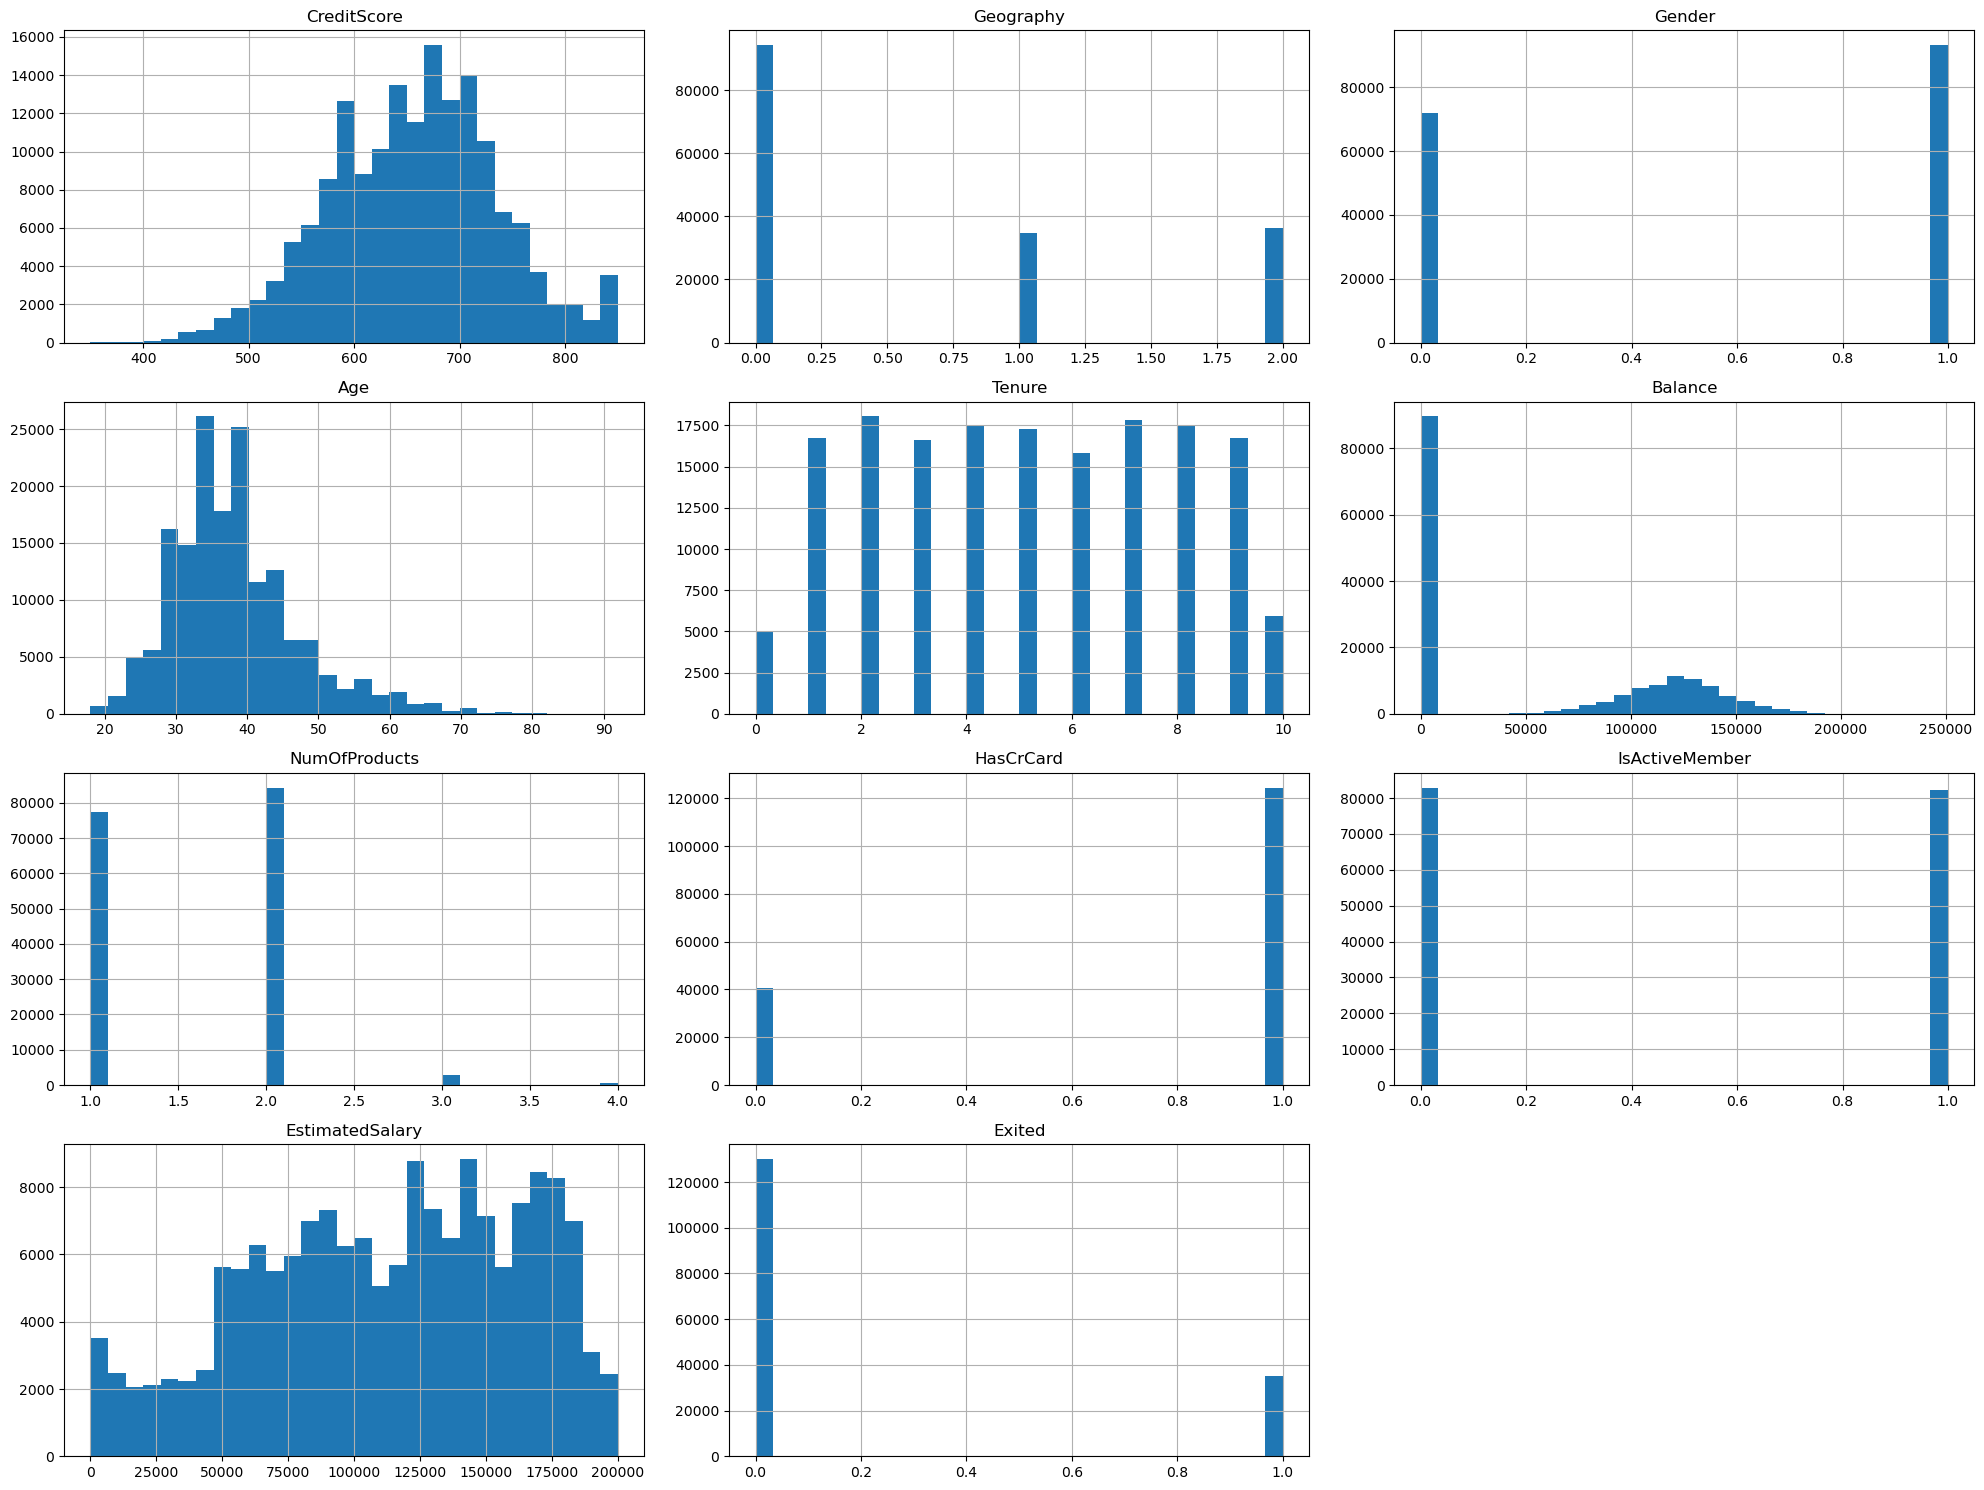

In [20]:
# Histograms
df_2.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

#### 6.3- Distributions

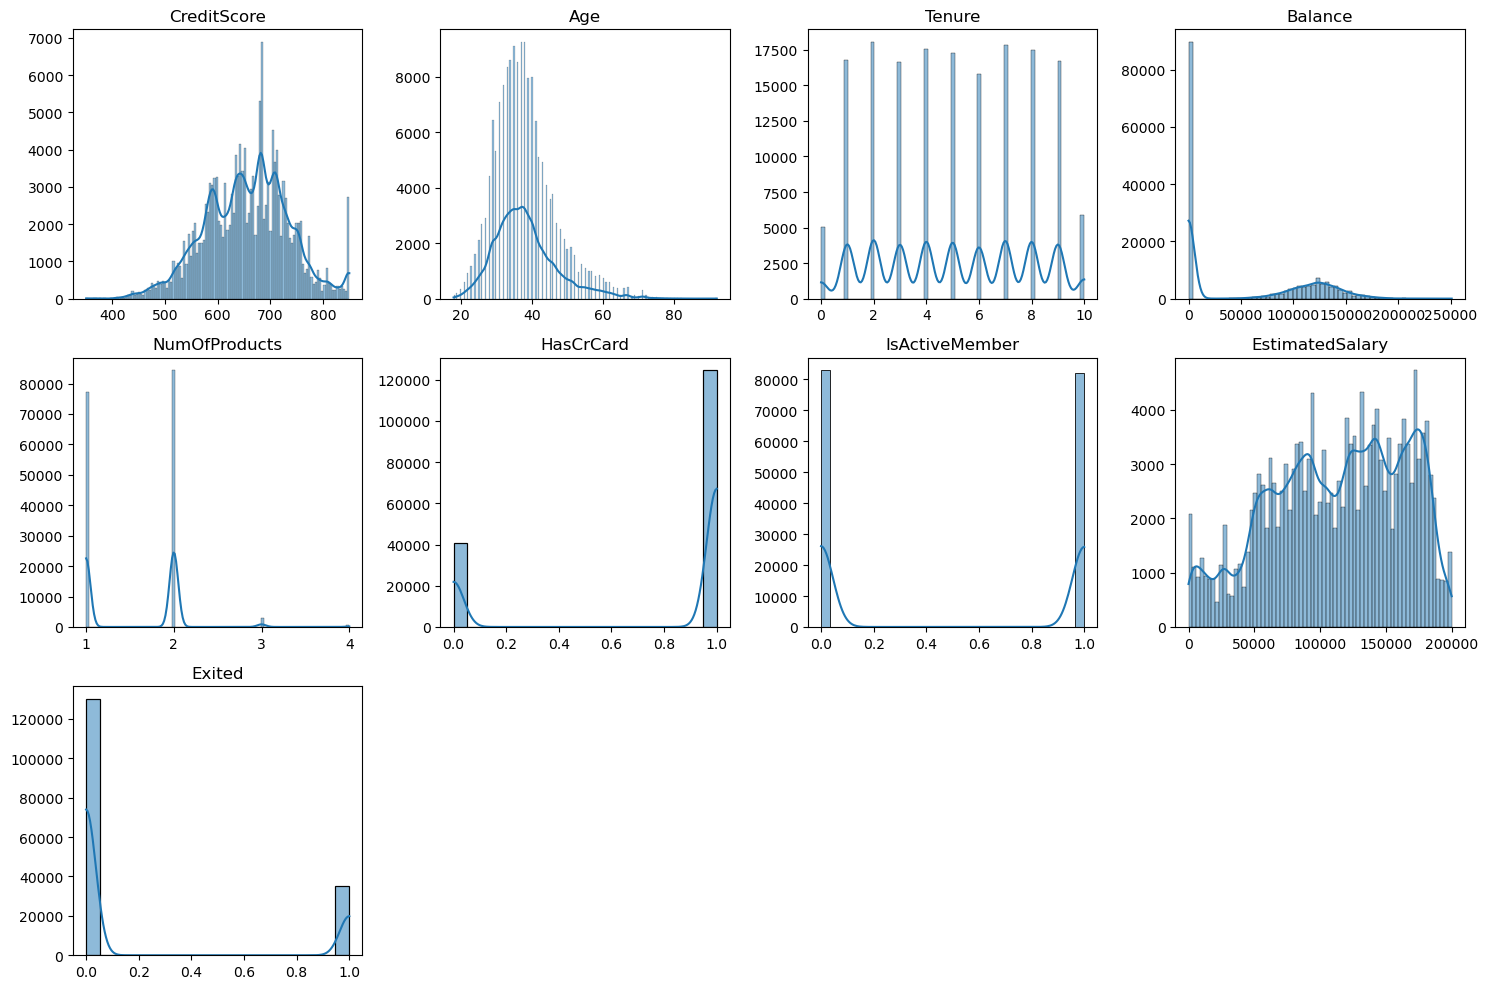

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_2 is your DataFrame
numeric_columns = df_2.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))  # Adjusting the size to accommodate all subplots

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Adjust the number of rows and columns if necessary
    sns.histplot(df_2[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


#### 6.4- Scatter-Plotting

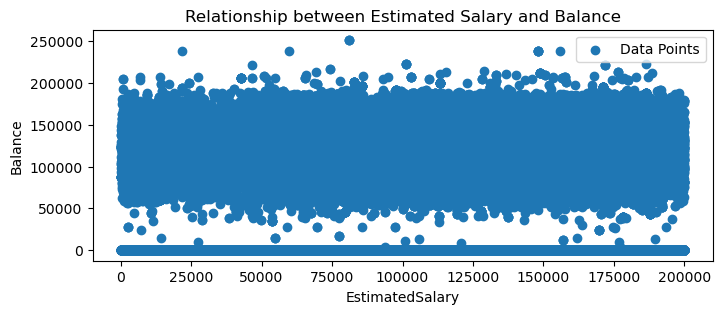

In [22]:
# Relationship between columns
plt.figure(figsize=(8, 3))  # Grafik boyutunu küçülttük
plt.scatter(df_2['EstimatedSalary'], df_2['Balance'], label='Data Points')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.title('Relationship between Estimated Salary and Balance')
plt.legend()
plt.show()

#### 6.5- Outliers Checking

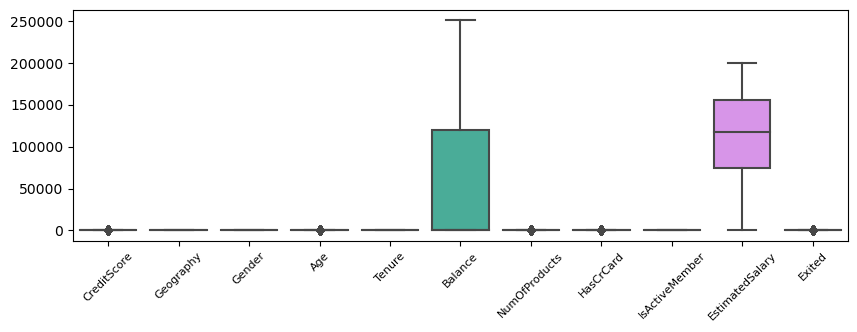

In [23]:
# Step 3: Plot the Boxplot
plt.figure(figsize=(10, 3))

sns.boxplot(data=df_2)
plt.xticks(rotation=45, fontsize=8)  
plt.show()

### 7- Building Model-0 // Benchmark

In [24]:
# Independent Features
X = df_2[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

# Dependent Features
y = df_2['Exited']

In [25]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### 7.1- Logistic Regression

In [26]:
# Logistic Regression modelini oluşturma ve eğitme
lr = LogisticRegression(solver="liblinear").fit(X_train, y_train)

In [27]:
# Run the Model Evaluation
evaluate_model(lr, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.7144343257306769

***Test ROC AUC: 0.7125823527226679***


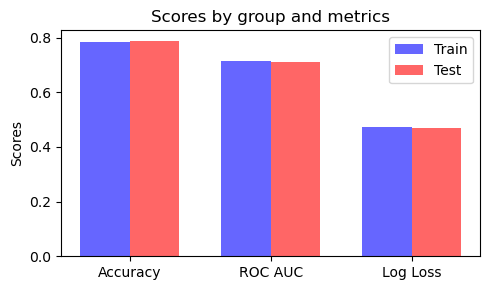

In [28]:
# Run Model Success Metrics Visuals
evaluate_model_performance(lr, X_train, X_test, y_train, y_test)

In [29]:
'''
## Evaluation:

ROC AUC measures the model's classification ability, and the closer it is to 1, the better the model performs. 
The ROC AUC score for the training set is 0.714, while the score for the test set is 0.712. 
These scores indicate that the model's classification ability is reasonable but not perfect.
'''
print('')

In [30]:
'''
## Conclusions and Recommendations:

Performance Improvement:
The model's ROC AUC score is around 0.71, suggesting that there is room for improvement in classification performance. 
This could be achieved by employing more complex models or by performing feature engineering to enhance the model's accuracy.

Balanced Dataset and Other Metrics:
If there is class imbalance in the dataset, the accuracy metric might be misleading. 
In such cases, it is beneficial to consider other metrics such as precision, recall, and F1 score.

Overfitting/Underfitting Analysis:
The training and test accuracies are quite close, indicating that the model is not overfitting and has a reasonable generalization capability. 
However, to further improve the model and capture more complex patterns in the data, more advanced models (e.g., Random Forest, Gradient Boosting) 
can be tried.

In conclusion, the current model performs well as a baseline evaluation. 
However, additional model tuning and data preprocessing steps can be undertaken to enhance performance, 
particularly to achieve higher accuracy and better ROC AUC scores.
'''
print('')

### 8- Data Cleaning

In [31]:
# Copy the dataset
df_3 = df_2

#### 8.1- Drop Outliers

##### 8.1.1- Balance

In [32]:
# Remove rows where Balance is zero
df_3 = df_3[df_3['Balance'] != 0]

# Calculate Q1 and Q3 on the non-zero Balance values
Q1 = df_3['Balance'].quantile(0.10)
Q3 = df_3['Balance'].quantile(0.90)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers among the non-zero balances
outliers = (df_3['Balance'] < lower_bound) | (df_3['Balance'] > upper_bound)

# Remove the identified outliers
df_3 = df_3[~outliers]

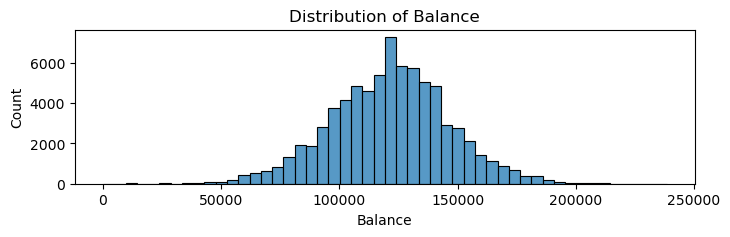

In [33]:
plt.figure(figsize=(8, 2))  
sns.histplot(df_3['Balance'], bins=50) 
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Balance')
plt.show()

##### 8.1.2- EstimatedSalary

In [34]:
# Remove rows where Balance is zero
df_3 = df_3[df_3['EstimatedSalary'] > 0]

# Calculate Q1 and Q3 on the non-zero Balance values
Q1 = df_3['EstimatedSalary'].quantile(0.10)
Q3 = df_3['EstimatedSalary'].quantile(0.90)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers among the non-zero balances
outliers = (df_3['EstimatedSalary'] < lower_bound) | (df_3['EstimatedSalary'] > upper_bound)

# Remove the identified outliers
df_3 = df_3[~outliers]

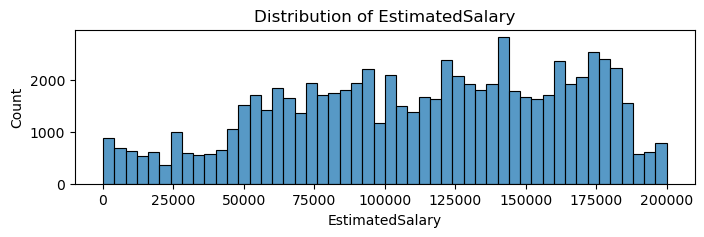

In [35]:
# Check Histogram for EstimatedSalary
plt.figure(figsize=(8, 2))  
sns.histplot(df_3['EstimatedSalary'], bins=50) 
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.title('Distribution of EstimatedSalary')
plt.show()

#### 8.2- Standart Scaler

In [36]:
# Copy the dataset
df_4 = df_3.copy()

In [37]:
# List of columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the selected columns
df_4[columns_to_scale] = min_max_scaler.fit_transform(df_4[columns_to_scale])

In [38]:
# Check the output
df_4 = df_4.reset_index(drop=True)

df_4.info()
df_4.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75383 entries, 0 to 75382
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      75383 non-null  float64
 1   Geography        75383 non-null  int32  
 2   Gender           75383 non-null  int32  
 3   Age              75383 non-null  float64
 4   Tenure           75383 non-null  float64
 5   Balance          75383 non-null  float64
 6   NumOfProducts    75383 non-null  int64  
 7   HasCrCard        75383 non-null  float64
 8   IsActiveMember   75383 non-null  float64
 9   EstimatedSalary  75383 non-null  float64
 10  Exited           75383 non-null  int64  
dtypes: float64(7), int32(2), int64(2)
memory usage: 5.8 MB


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.462,0,1,0.216216,0.2,0.624511,1,1.0,1.0,0.422787,0
1,0.476,1,1,0.243243,0.4,0.552757,1,1.0,0.0,0.680129,1


### 9- Building Alternative Models

#### 9.1- Model 1 - Decision Trees

In [39]:
# Models initialization
decision_tree = DecisionTreeClassifier()

In [40]:
# Train the Decision Tree Model
dt = decision_tree.fit(X_train, y_train)

In [41]:
# Run the Model Evaluation
evaluate_model(dt, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.9999719213227918

***Test ROC AUC: 0.688081133171238***


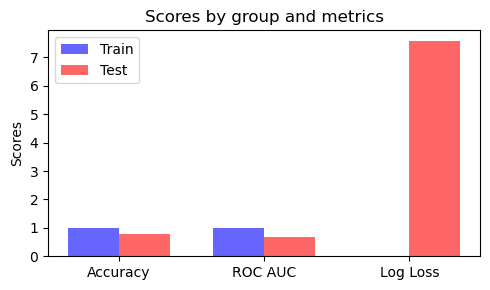

In [42]:
# Run Model Success Metrics Visuals
evaluate_model_performance(dt, X_train, X_test, y_train, y_test)

In [43]:
# Compare with Benchmark Model
evaluate_model(lr, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.7144343257306769

***Test ROC AUC: 0.7125823527226679***


Here, it is obvious Benchmark Model is Better.

#### 9.2- Model 2 - Random Forest

In [44]:
# Models initialization
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Train the Random Forest Model
rf = random_forest.fit(X_train, y_train)

In [46]:
# Run the Model Evaluation
evaluate_model(rf, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.9998943129293348

***Test ROC AUC: 0.8542305992800582***


⚠ Overfitting 

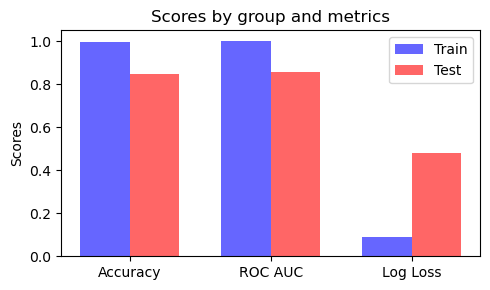

In [47]:
# Run Model Success Metrics Visuals
evaluate_model_performance(rf, X_train, X_test, y_train, y_test)

In [48]:
# Compare with Benchmark Model - Linear Regression
evaluate_model(lr, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.7144343257306769

***Test ROC AUC: 0.7125823527226679***


In [49]:
'''
#### General Comments:
The Random Forest Model shows excellent performance on the training set while experiencing a performance drop on the test set. 
This indicates that the model might be overfitting and could have reduced performance when encountering new data. 
On the other hand, the Linear Regression Model demonstrates more balanced performance, showing similar results on both the training and test sets, 
indicating better generalization.

#### Which Model is Better?
Given the results, 
the Linear Regression Model is better overall due to its balanced performance and better generalization, 
with a lower risk of overfitting compared to the Random Forest Model.
'''
print('')

#### 9.3- Model 3 - Gradient Boosting Machines

In [50]:
# Models initialization
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [51]:
# Train the Gradient Boosting
gb = gradient_boosting.fit(X_train, y_train)

In [52]:
# Run the Model Evaluation
evaluate_model(gb, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.8766429056948666

***Test ROC AUC: 0.8755011674144225***


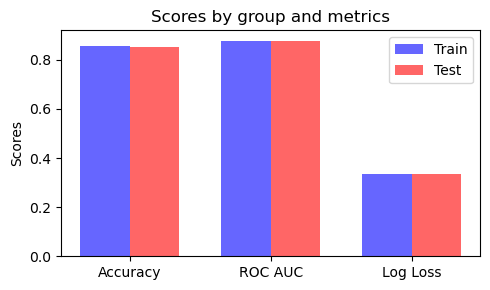

In [53]:
# Run Model Success Metrics Visuals
evaluate_model_performance(gb, X_train, X_test, y_train, y_test)

In [54]:
# Compare with Benchmark Model - Linear Regression
evaluate_model(lr, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.7144343257306769

***Test ROC AUC: 0.7125823527226679***


In [55]:
'''
### General Comments:
The Gradient Boosting Model demonstrates better performance with higher ROC AUC scores on both the training and test sets. 
This indicates that the model is more powerful and effective. The Linear Regression Model, while having lower ROC AUC scores, 
shows consistent performance across both training and test sets.

### Which Model is Better?
The Gradient Boosting Model is a better model due to its high ROC AUC scores and balanced performance. 
This model will yield better results on the dataset. 
The Linear Regression Model, on the other hand, is simpler and requires less computational power, 
but it is not as strong in performance as the Gradient Boosting Model.

In conclusion, in terms of performance and generalization ability, the Gradient Boosting Model is superior.

'''
print('')

#### 9.4- Model 4 - xgboost

In [56]:
# Models initialization
xgboost = XGBClassifier(n_estimators=100, random_state=42)

In [57]:
# Train models
xgb = xgboost.fit(X_train, y_train)

In [58]:
# Run the Model Evaluation
evaluate_model(xgb, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.9026859102664457

***Test ROC AUC: 0.8733305317304512***


In [59]:
evaluate_model_loss(xgb, X_train, X_test, y_train, y_test)

Training Log Loss: 0.30409364010338197

***Test Log Loss: 0.3384642598606208***


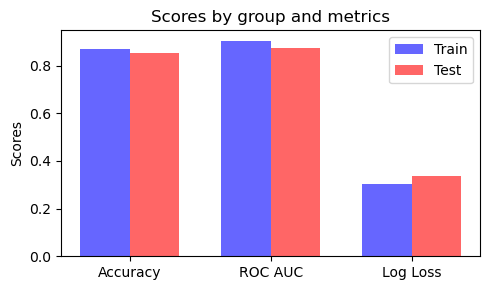

In [60]:
# Run Model Success Metrics Visuals
evaluate_model_performance(xgb, X_train, X_test, y_train, y_test)

In [61]:
# Compare with Model 3
evaluate_model(gb, X_train, X_test, y_train, y_test)

Training ROC AUC: 0.8766429056948666

***Test ROC AUC: 0.8755011674144225***


In [62]:
evaluate_model_loss(gb, X_train, X_test, y_train, y_test)

Training Log Loss: 0.3368373793174802

***Test Log Loss: 0.33630250669880946***


In [63]:
'''

### General Comments:
The XGBoost Model demonstrates excellent performance with high ROC AUC scores on both the training and test sets. 
This indicates that the model is powerful and effective. Additionally, the model shows low Log Loss values, further confirming its strong performance.

### Which Model is Better?
The XGBoost Model is superior due to its high ROC AUC scores and low Log Loss values. 
This model will yield better results on the dataset. In conclusion, in terms of performance and generalization ability, the XGBoost Model is better.

'''
print('')

#### 10- Handling Imbalanced Data

In [64]:
# Check the class Balances 
class_distribution = y.value_counts(normalize=True)
print(class_distribution)

Exited
0    0.788401
1    0.211599
Name: proportion, dtype: float64


The script checks the class distribution of the target variable y to identify imbalances in the dataset. The output shows that 78.84% of the samples belong to class 0 and 21.16% to class 1. This indicates a significant class imbalance, which needs to be addressed to ensure the machine learning model performs well on both classes. Handling this imbalance is crucial for building a reliable and unbiased model.

In [65]:
# Random over-sampling
ros = RandomOverSampler(random_state=42)
X_rs, y_rs = ros.fit_resample(df_4.drop(columns='Exited'), df_4['Exited'])

In [66]:
# Sınıf dağılımını kontrol etme
class_distribution = y_rs.value_counts(normalize=True)
class_distribution

Exited
0    0.5
1    0.5
Name: proportion, dtype: float64

The RandomOverSampler from the imblearn library is used to duplicate samples from the minority class until both classes have an equal number of samples. After applying the over-sampling technique, the class distribution is checked again, showing that both classes now have equal proportions of 50%. This helps in mitigating the issues caused by imbalanced data and ensures that the machine learning model will have a better chance of learning from both classes equally.

#### 11- Re-Train Models with Balanced Dataset 

In [67]:
# Split Test and Train dataset
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(X_rs, y_rs, test_size=0.3, random_state=42)

In [68]:
# Logistic Regression model
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train_rs, y_train_rs)

# Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_rs, y_train_rs)

# XGBoost model
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train_rs, y_train_rs)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
# Modelleri değerlendirme
models = {
    'Logistic Regression': lr,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}

In [70]:
for name, model in models.items():

    y_pred = model.predict(X_test_rs)
    y_pred_proba = model.predict_proba(X_test_rs)[:, 1]
    print("")
    print(f"{name} Results:")
    print(f"ROC AUC: {roc_auc_score(y_test_rs, y_pred_proba)}")


Logistic Regression Results:
ROC AUC: 0.7740391076377978

Gradient Boosting Results:
ROC AUC: 0.8421918987971475

XGBoost Results:
ROC AUC: 0.8710309896663486


### Explanation:
The XGBoost model has shown the best performance on the balanced dataset, achieving the highest ROC AUC score of 0.8710309896663486. This indicates that the XGBoost model is highly effective at distinguishing between the classes in the dataset. The balancing of the dataset has likely contributed to this success by providing an equal number of samples for each class, which helps the model learn more effectively and avoid biases towards the majority class.

Overall, XGBoost's superior performance on the balanced dataset suggests that it is a robust and reliable model for classification tasks, especially when dealing with previously imbalanced data.

### 12- Feature Engineering

#### 12.1 Correlation Test

(10.5, -0.5)

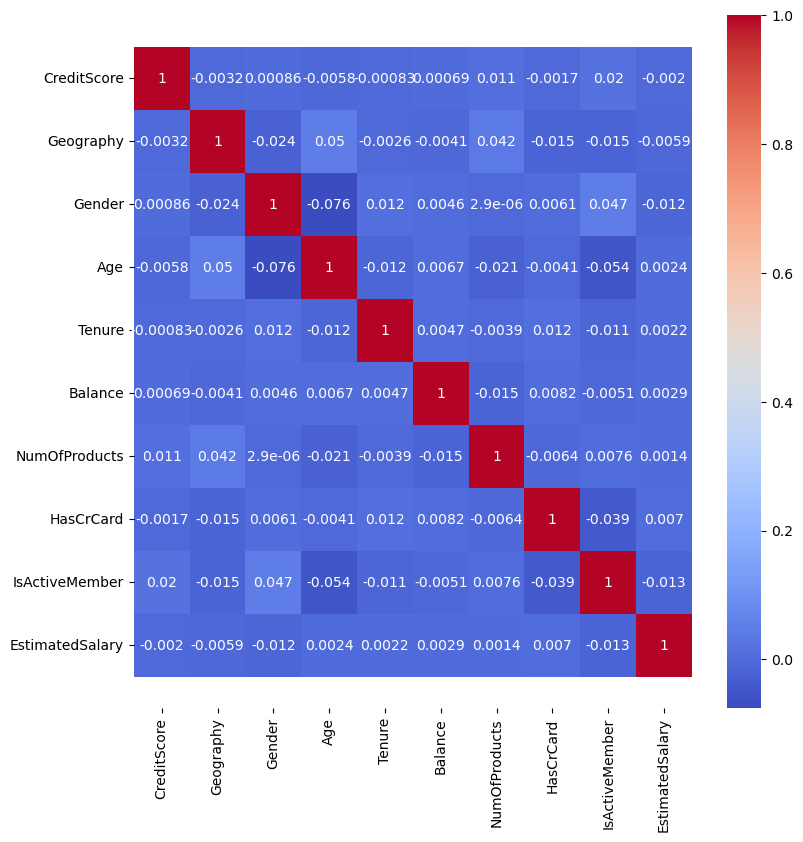

In [71]:
# Create Correlation Matrix 

corr = X_rs.corr()
plt.figure(figsize=(9,9))

corr_select = sns.heatmap(corr, annot=True, cmap='coolwarm')
bottom, top = corr_select.get_ylim()

corr_select.set_ylim(bottom + 0.5, top - 0.5)

In [72]:
# Drop highly correlated columns 

def correlated_columns(X_rs, threshold):
    
    col_corr    = set()
    corr_matrix = X_rs.corr()
    
    for i in range(len(corr_matrix.columns)):
    
        for j in range(i):
                   
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                   
    return col_corr

In [73]:
# If the correlation between columns are higher than 80% then drop these columns

corr_features = correlated_columns(X_rs, 0.8)
len(set(corr_features))

0

In [72]:
'''

### Output:
The script identifies and counts the number of highly correlated columns with a correlation higher than 80%. 
In this case, there are no highly correlated columns to drop, as indicated by the output 0.

This process ensures that the dataset is free from multicollinearity, which helps in building more reliable and interpretable machine learning models.

'''

print('')

#### 12.2 Recursive Feature Elimination

In [74]:
results = []

for n_features in range(1, X_train_rs.shape[1] + 1):
    
    rfe = RFE(estimator=xgb, n_features_to_select=n_features)
    rfe.fit(X_train_rs, y_train_rs)
    
    # Seçilen özelliklerle modeli eğitme
    X_train_rfe = X_train_rs.loc[:, rfe.support_]
    X_test_rfe  = X_test_rs.loc[:, rfe.support_]
    
    xgb.fit(X_train_rfe, y_train_rs)

    # Model evaluation
    y_pred = xgb.predict(X_test_rfe)
    y_pred_proba = xgb.predict_proba(X_test_rfe)[:, 1]
    
    accuracy = accuracy_score(y_test_rs, y_pred)
    roc_auc = roc_auc_score(y_test_rs, y_pred_proba)
    results.append((n_features, accuracy, roc_auc))

In [76]:

# Sonuçları yazdırma
for n_features, _, roc_auc in results:
    print(f"Number of features: {n_features}, ROC AUC: {roc_auc:.4f}")

Number of features: 1, ROC AUC: 0.6279
Number of features: 2, ROC AUC: 0.7763
Number of features: 3, ROC AUC: 0.8065
Number of features: 4, ROC AUC: 0.8334
Number of features: 5, ROC AUC: 0.8410
Number of features: 6, ROC AUC: 0.8430
Number of features: 7, ROC AUC: 0.8561
Number of features: 8, ROC AUC: 0.8646
Number of features: 9, ROC AUC: 0.8709
Number of features: 10, ROC AUC: 0.8710


The results show that the ROC AUC score generally increases with the number of features and reaches its highest value with all 10 features. Thus, the best performance is achieved with all features, and there is no need to drop any features. This means that using all available features provides the most accurate predictions for the XGBoost model.

### 13- Hyperparameter Tuning

#### 13.1- Grid Search

In [77]:
# Hyperparameter Grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Model initialization
xgb_model = XGBClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_rs, y_train_rs)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='roc_auc', verbose=2)

In [78]:
# Best Parameters
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best ROC AUC score: {grid_search.best_score_}")

Best parameters found: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best ROC AUC score: 0.8666041011492792


In [79]:
# Model with Best Parameters
xgb_model_w_gs = grid_search.best_estimator_

In [80]:
# Train the Model with Best Parameters
xgb_model_w_gs = xgb_model_w_gs.fit(X_train_rs, y_train_rs)

In [81]:
# Run the Model Evaluation
evaluate_model(xgb_model_w_gs, X_train_rs, X_test_rs, y_train_rs, y_test_rs)

Training ROC AUC: 0.8980844493435591

***Test ROC AUC: 0.866180847079191***


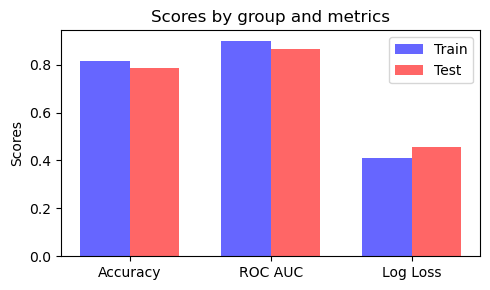

In [82]:
# Run Model Success Metrics Visuals
evaluate_model_performance(xgb_model_w_gs, X_train_rs, X_test_rs, y_train_rs, y_test_rs)

#### 13.2- Random Search

In [83]:
# Hyperparameter dağılımı
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_depth': [int(x) for x in np.linspace(3, 10, num=8)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# XGBoost modeli
xgb_model = XGBClassifier(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train_rs, y_train_rs)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                                        'n_estimators': [50, 66, 83, 100, 116,
                                                         133, 150, 166, 183,
                                                         200],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [84]:
# Best Parameters
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best ROC AUC score: {random_search.best_score_}")

Best parameters found: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 1.0}
Best ROC AUC score: 0.9201262335106843


In [85]:
# Model with Best Parameters
xgb_model_w_rs = random_search.best_estimator_

In [86]:
# Train the Model with Best Parameters
xgb_model_w_rs = xgb_model_w_rs.fit(X_train_rs, y_train_rs)

In [87]:
# Run the Model Evaluation
evaluate_model(xgb_model_w_rs, X_train_rs, X_test_rs, y_train_rs, y_test_rs)

Training ROC AUC: 0.999899046630723

***Test ROC AUC: 0.9405109341692692***


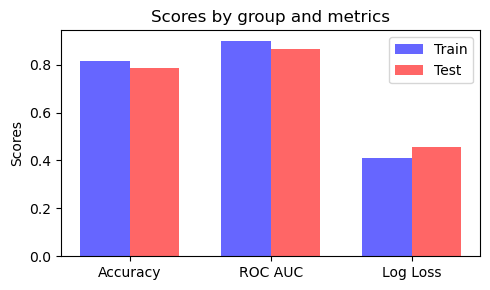

In [88]:
# Run Model Success Metrics Visuals
evaluate_model_performance(xgb_model_w_gs, X_train_rs, X_test_rs, y_train_rs, y_test_rs)

### Which Model is Better?
Random Search appears to yield a better-performing model with higher ROC AUC scores and lower log loss values.
While both models show some degree of overfitting (indicated by the difference between training and test log loss), the Random Search model demonstrates better generalization and overall performance.

### Conclusion:
In terms of performance and generalization ability, Random Search is superior to Grid Search for this specific XGBoost model on the given dataset. The higher ROC AUC and lower log loss values indicate that Random Search has found a better set of hyperparameters, leading to improved model performance.

### 14- Cross Validation

In [89]:
# k-fold Cross Validation
k = 10  
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Cross-validation
cv_results = cross_val_score(xgb_model_w_rs, X_train_rs, y_train_rs, cv=stratified_kfold, scoring='roc_auc')
print(f"Cross-Validation ROC AUC scores: {cv_results}")
print('')
print(f"Mean ROC AUC score: {np.mean(cv_results)}")

Cross-Validation ROC AUC scores: [0.9379268  0.93592927 0.93459374 0.9406093  0.939401   0.93922136
 0.93986024 0.94154947 0.93857217 0.93759204]

Mean ROC AUC score: 0.9385255387233311


### Conclusion:
The high mean ROC AUC score (0.9385) suggests that the model has excellent discriminative ability and performs consistently well across different subsets of the training data.
The individual fold scores are also very close to each other, showing low variance and implying that the model is stable and reliable.
This evaluation indicates that the model is well-tuned and generalizes effectively to unseen data, making it a robust choice for this classification task.